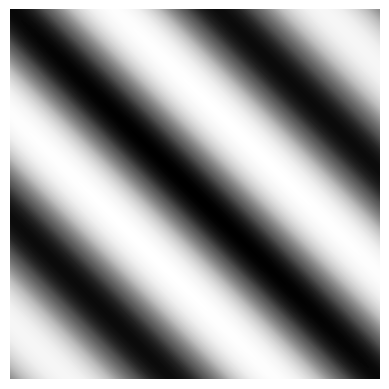

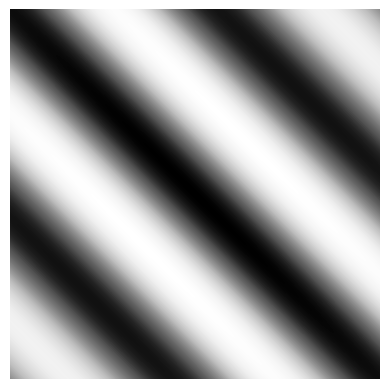

In [141]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gabor_kernel(ksize, sigma, theta, lambd, gamma, psi, resolution, contrast):
    """Create a Gabor kernel with an additional blur control."""
    # Normalize contrast
    contrast = contrast * 3.0 / 5.0
    
    # Adjust sigma based on the contrast
    sigma_x = sigma * contrast
    sigma_y = (sigma / gamma) * contrast

    # Bounding box
    xmax = ksize // 2
    ymax = ksize // 2
    xmin = -xmax
    ymin = -ymax

    # Create a higher-resolution grid
    (y, x) = np.meshgrid(
        np.linspace(ymin, ymax, int((ymax - ymin + 1) * resolution)),
        np.linspace(xmin, xmax, int((xmax - xmin + 1) * resolution))
    )

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    # Gabor kernel calculation
    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / lambd * x_theta + psi)
    return gb

# Parameters
ksize = 31  # Kernel size
sigma = 10  # Standard deviation of the Gaussian envelope
theta = 3*np.pi/4 # Orientation in radians
lambd = 12  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset
resolution = 50  # Enhance resolution by a factor
contrast = 10 # Adjust contrast
color = 'Grays'

# Generate the Gabor kernel
kernel = gabor_kernel(ksize, sigma, theta, lambd, gamma, psi, resolution, contrast)

# Visualize the kernel
plt.imshow(kernel, cmap=color, extent=(-ksize // 2, ksize // 2, -ksize // 2, ksize // 2))
plt.axis('off')
plt.show()